In [145]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

sns.set()
sns.set_style("whitegrid")
colors = sns.color_palette("colorblind", 16)

DATA_FOLDER = '../data/raw/'

# Cryptos

### Bitcoin

In [224]:
df = pd.read_csv(DATA_FOLDER+'cryptos/'+'{}.csv'.format('BTC-USD'), header=1)
df['date'] = pd.to_datetime(df.date)
df = df[['date','open']]
df.set_index('date', inplace=True)
df.sort_index(inplace=True)
df["log_return"] = np.log(df["open"] / df["open"].shift(1))
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)


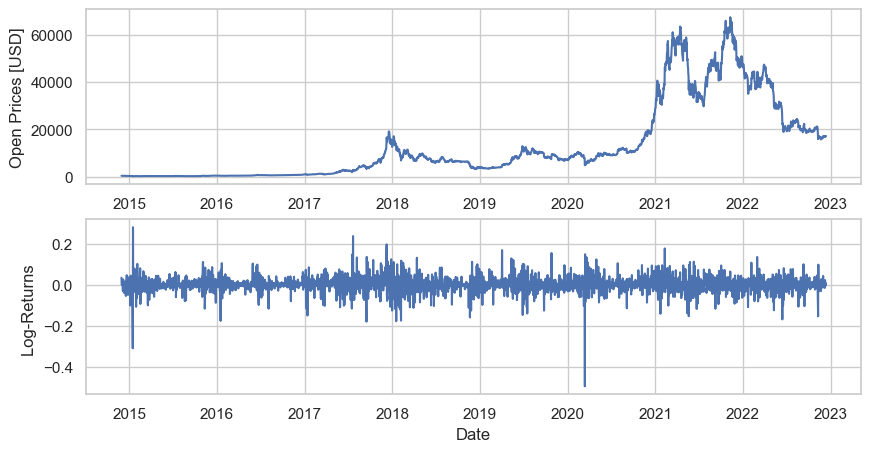

In [225]:
fig, axs = plt.subplots(2, figsize=(10, 5))
axs[0].plot(df.open)
axs[0].set_ylabel('Open Prices [USD]')
axs[1].plot(df.log_return)
axs[1].set_ylabel('Log-Returns ')

plt.xlabel('Date')
plt.show()

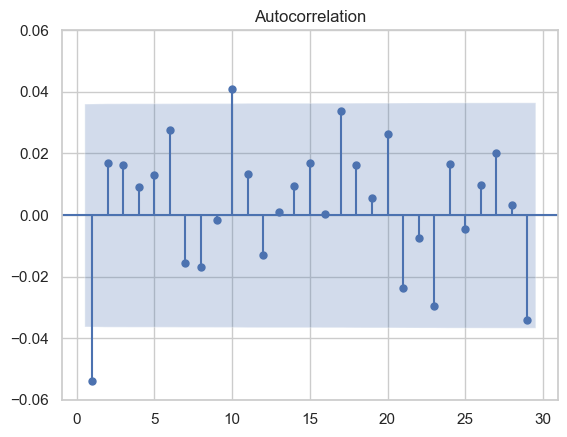

In [161]:
sm.graphics.tsa.plot_acf(df.log_return, lags=np.arange(1, 30))
plt.ylim([-0.06,0.06])
plt.show()

### Ether

In [241]:
df = pd.read_csv(DATA_FOLDER+'cryptos/'+'{}.csv'.format('ETH-USD'), header=1)
df['date'] = pd.to_datetime(df.date)
df = df[['date','open']]
df.set_index('date', inplace=True)
df.sort_index(inplace=True)
df["log_return"] = np.log(df["open"] / df["open"].shift(1))
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

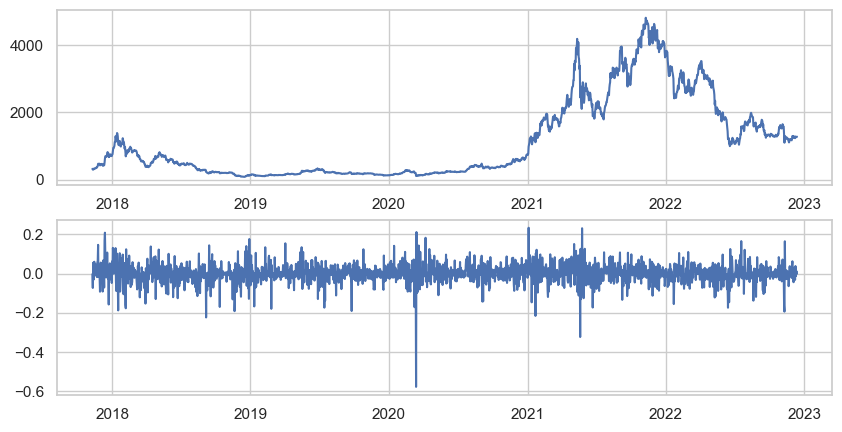

In [242]:
fig, axs = plt.subplots(2, figsize=(10, 5))
axs[0].plot(df.open)
axs[1].plot(df.log_return)
plt.show()

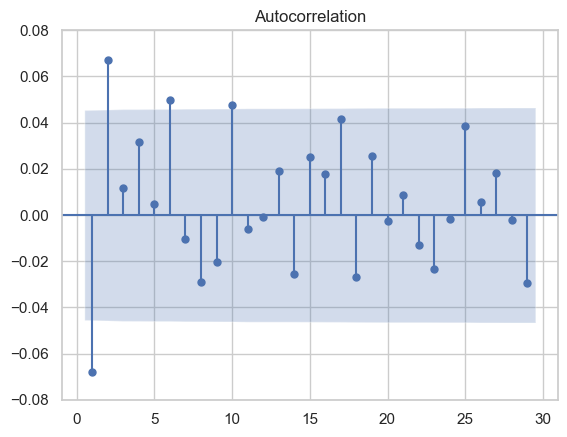

In [243]:
sm.graphics.tsa.plot_acf(df.log_return, lags=np.arange(1, 30))
plt.ylim([-0.08,0.08])
plt.show()

### Ripple

In [245]:
df = pd.read_csv(DATA_FOLDER+'cryptos/'+'{}.csv'.format('XRP-USD'), header=1)
df['date'] = pd.to_datetime(df.date)
df = df[['date','open']]
df.set_index('date', inplace=True)
df.sort_index(inplace=True)
df["log_return"] = np.log(df["open"] / df["open"].shift(1))
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

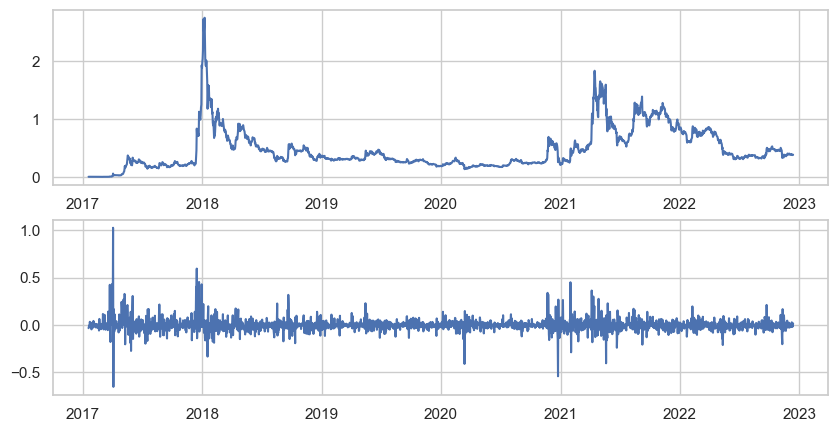

In [246]:
fig, axs = plt.subplots(2, figsize=(10, 5))
axs[0].plot(df.open)
axs[1].plot(df.log_return)
plt.show()

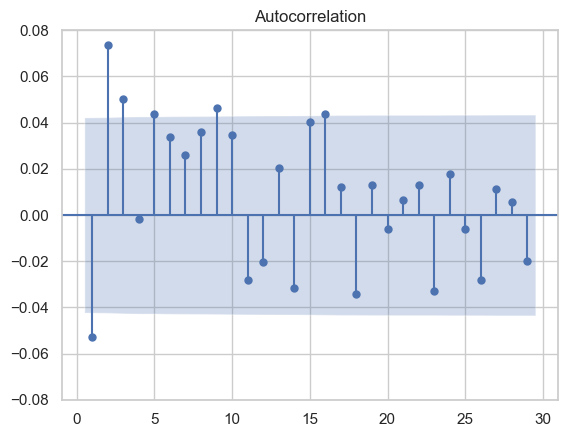

In [247]:
sm.graphics.tsa.plot_acf(df.log_return, lags=np.arange(1, 30))
plt.ylim([-0.08,0.08])
plt.show()

# Commodities

### Gold

In [250]:
df = pd.read_csv(DATA_FOLDER+'commodities/'+'{}.csv'.format('LBMA-GOLD'))
df.drop(columns=['USD (PM)', 'GBP (AM)', 'GBP (PM)', 'EURO (AM)', 'EURO (PM)'], inplace=True)
df.rename(columns={'USD (AM)':'Price'}, inplace=True)
df['Date'] = pd.to_datetime(df.Date)
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
df["log_return"] = np.log(df["Price"] / df["Price"].shift(1))
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

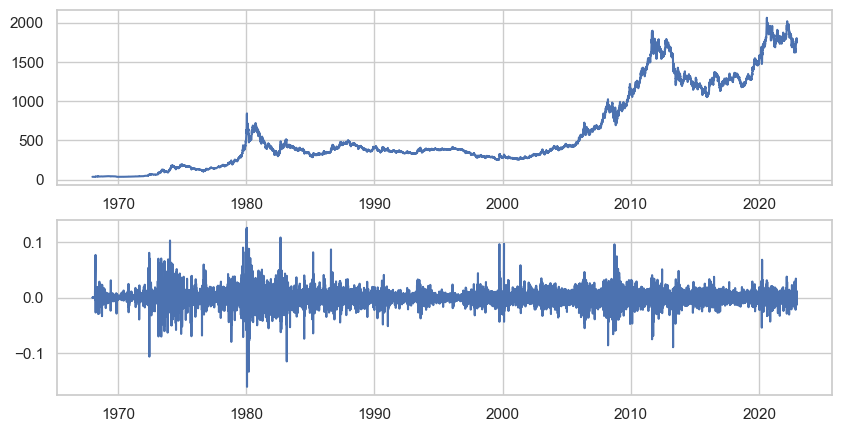

In [251]:
fig, axs = plt.subplots(2, figsize=(10, 5))
axs[0].plot(df.Price)
axs[1].plot(df.log_return)
plt.show()

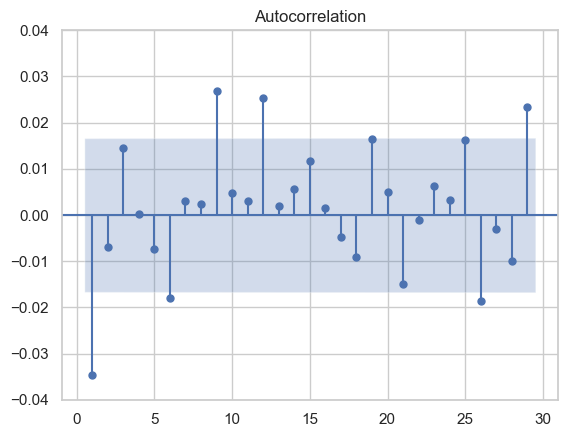

In [252]:
sm.graphics.tsa.plot_acf(df.log_return, lags=np.arange(1, 30))
plt.ylim([-0.04,0.04])
plt.show()

### Natural gas

In [255]:
df = pd.read_csv(DATA_FOLDER+'commodities/'+'{}.csv'.format('NYMEX-NG'))
df = df[['Date','Open']]
df['Date'] = pd.to_datetime(df.Date)
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
df["log_return"] = np.log(df["Open"] / df["Open"].shift(1))
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

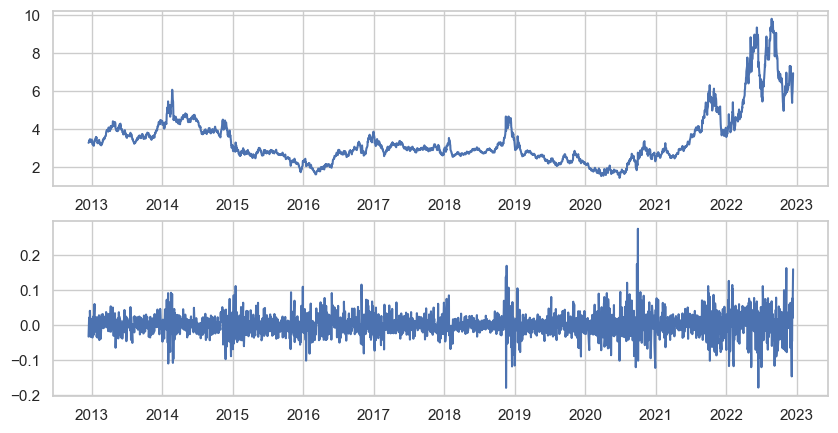

In [256]:
fig, axs = plt.subplots(2, figsize=(10, 5))
axs[0].plot(df.Open)
axs[1].plot(df.log_return)
plt.show()

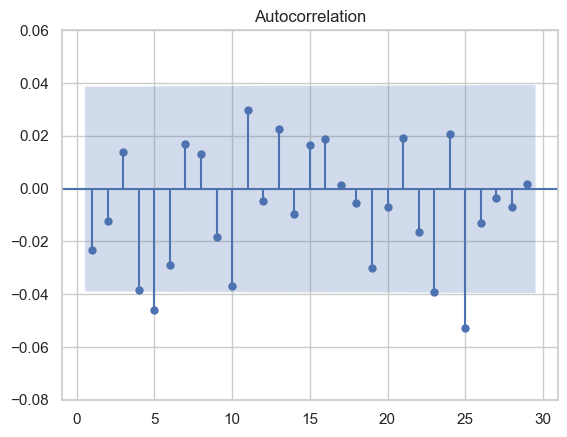

In [257]:
sm.graphics.tsa.plot_acf(df.log_return, lags=np.arange(1, 30))
plt.ylim([-0.08,0.06])
plt.show()

### Oil

In [262]:
df = pd.read_csv(DATA_FOLDER+'commodities/'+'{}.csv'.format('OPEC-ORB'))
df.rename(columns={'Value':'Price'}, inplace=True)
df['Date'] = pd.to_datetime(df.Date)
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
df["log_return"] = np.log(df["Price"] / df["Price"].shift(1))
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

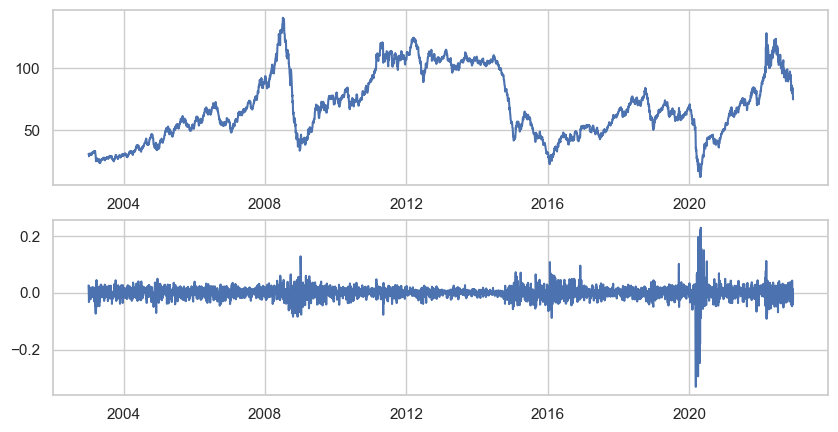

In [263]:
fig, axs = plt.subplots(2, figsize=(10, 5))
axs[0].plot(df.Price)
axs[1].plot(df.log_return)
plt.show()

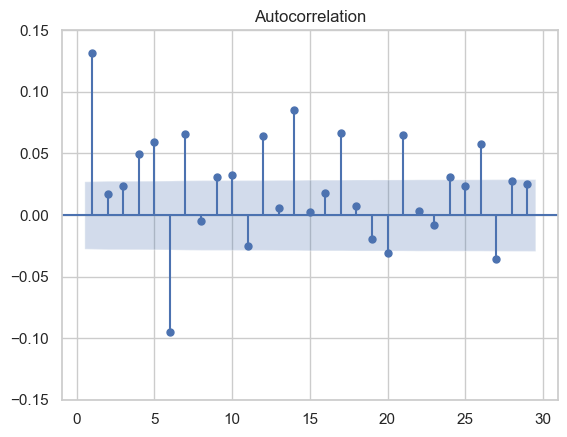

In [264]:
sm.graphics.tsa.plot_acf(df.log_return, lags=np.arange(1, 30))
plt.ylim([-0.15,0.15])
plt.show()

# Stock market index

### S&P 500

In [267]:
df = pd.read_csv(DATA_FOLDER+'stock_market_index/'+'{}.csv'.format('SP500'))
df['Open'] = df['Open'].apply(lambda x: re.sub(",","",x))
df['Open'] = pd.to_numeric(df['Open'])
df = df[['Date', 'Open']]
df['Date'] = pd.to_datetime(df.Date)
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
df["log_return"] = np.log(df["Open"] / df["Open"].shift(1))
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

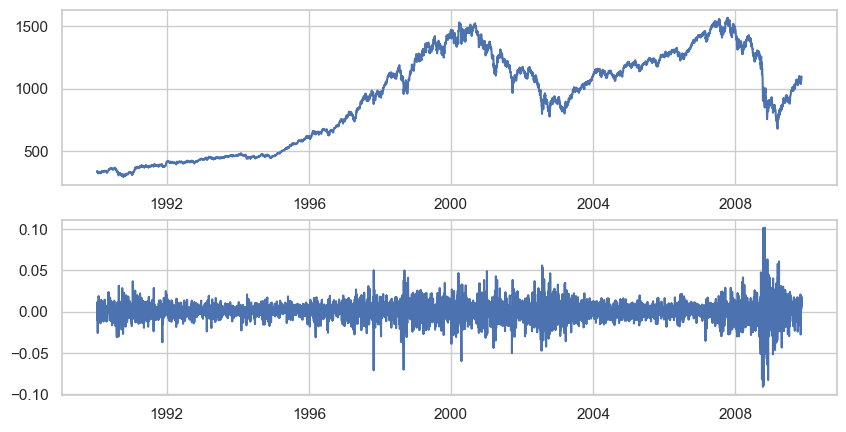

In [268]:
fig, axs = plt.subplots(2, figsize=(10, 5))
axs[0].plot(df.Open)
axs[1].plot(df.log_return)
plt.show()

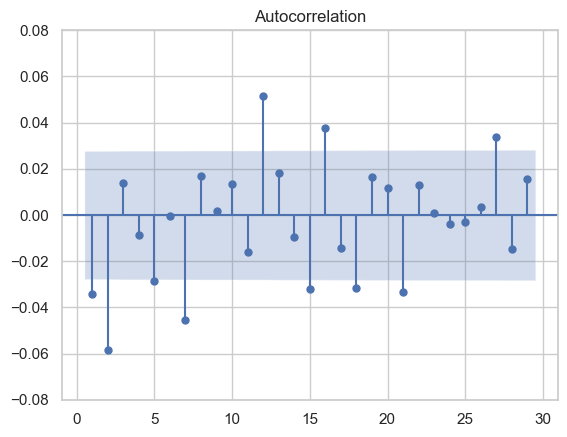

In [269]:
sm.graphics.tsa.plot_acf(df.log_return, lags=np.arange(1, 30))
plt.ylim([-0.08,0.08])
plt.show()

### CAC 40

In [271]:
df = pd.read_csv(DATA_FOLDER+'stock_market_index/'+'{}.csv'.format('CAC40'))
df = df[['Date', 'Open']]
df['Date'] = pd.to_datetime(df.Date)
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
df["log_return"] = np.log(df["Open"] / df["Open"].shift(1))
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)


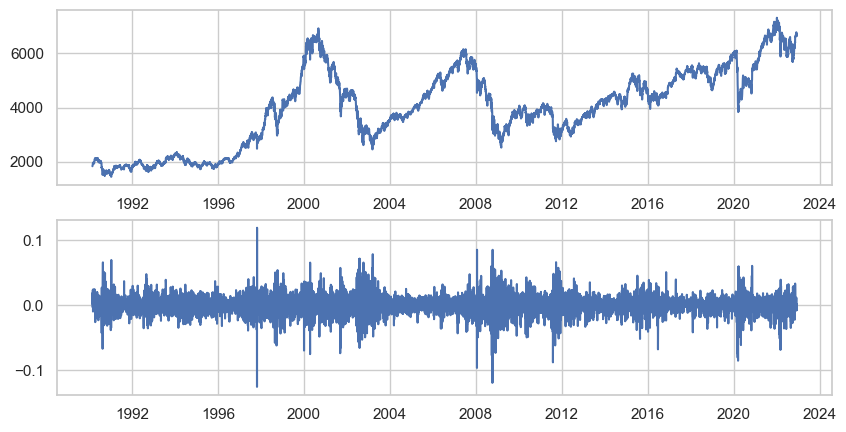

In [272]:
fig, axs = plt.subplots(2, figsize=(10, 5))
axs[0].plot(df.Open)
axs[1].plot(df.log_return)
plt.show()

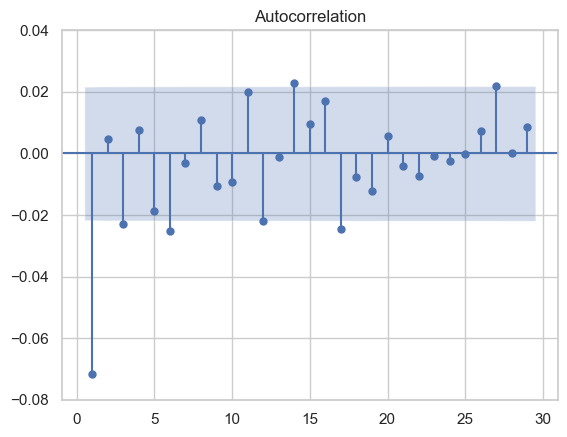

In [273]:
sm.graphics.tsa.plot_acf(df.log_return, lags=np.arange(1, 30))
plt.ylim([-0.08,0.04])
plt.show()

### SMI

In [275]:
df = pd.read_csv(DATA_FOLDER+'stock_market_index/'+'{}.csv'.format('SMI'))
df = df[['Date', 'Open']]
df['Date'] = pd.to_datetime(df.Date)
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
df["log_return"] = np.log(df["Open"] / df["Open"].shift(1))
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

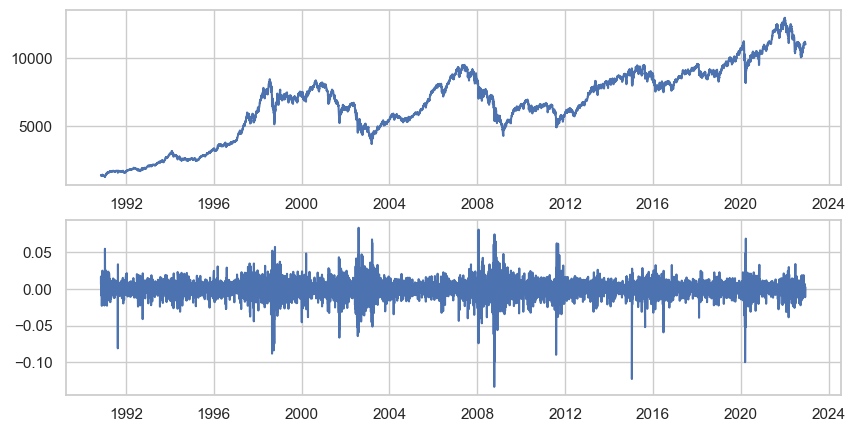

In [276]:
fig, axs = plt.subplots(2, figsize=(10, 5))
axs[0].plot(df.Open)
axs[1].plot(df.log_return)
plt.show()

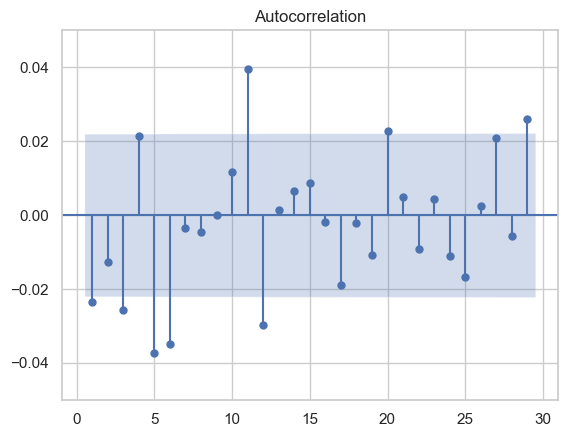

In [277]:
sm.graphics.tsa.plot_acf(df.log_return, lags=np.arange(1, 30))
plt.ylim([-0.05,0.05])
plt.show()